In [28]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [29]:
def power(n=50):
    # 5.5
    p = 1/2
    alpha = 0.05
    binom = stats.binom(n, p)
    critical_value = binom.ppf(1 - alpha) # 31

    # P(reject H_0 | H_0)
    a = 1 - binom.cdf(critical_value)

    # P(retain H_0 | H_theta)
    binom = stats.binom(n, 0.75)
    beta = binom.cdf(critical_value)

    # power
    return 1 - beta

5.5)

(i) The null hypothesis for the coins is $H_0 : \theta = \frac{1}{2}$ and the alternate hypothesis is $H_{\theta} : \theta > \frac{1}{2}$. After sampling $n = 50$ coin flips, at $\alpha = 0.05$ we could reject this hypothesis if we recorded $X > 31$ heads.

(ii) In this instance, $a = P(\text{reject } H_0 | H_0) = 0.032$

(iii) If $H_\theta$ is true, then $\beta = P(\text{retain } H_0 | H_\theta) = P(X \leq 31 | H_\theta)= 0.028$

(iv) The power is $1 - \beta = 0.97$

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater_equal
  import sys


23

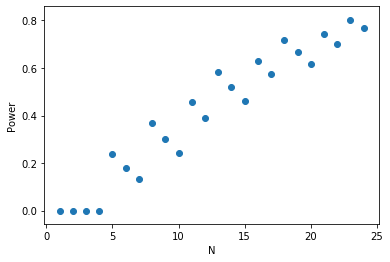

In [39]:
# 5.6 find the smallest n for with the power is greater than 0.8
ns = np.arange(25)
powers = np.vectorize(power)(ns)
plt.scatter(ns, powers)
plt.xlabel('N')
plt.ylabel('Power')
list(powers >= 0.8).index(1)

5.6) The smallest value of $n$ for which the above power $1 - \beta \geq 0.8$ is $n_\text{min} = 23$.

In [5]:
# 5.7
poisson = stats.poisson(70)
alpha = 0.05
critical_value = poisson.ppf(alpha)
critical_value # 57

# but what if the true lambda is actually lambda = 55? then the probability of retaining null hypothesis
# is the probability that our test statistic N >= 57 according to Poisson(55)
lambda_ = 55
poisson = stats.poisson(lambda_)
beta = 1 - poisson.cdf(critical_value)
beta # 0.36

0.36056634646765284

5.7)

(i) The largest value of $N$, is $n_{\text{max}} = 57$ where we retain the null hypothesis when $N \geq n_{\text{max}}$

(ii) According to the null hypothesis, $H_0 : N$ ~ $\text{Poisson}(70)$, we would reject $H_0$ if our test sample yields $N \geq 57$. But if the true distribution is $N$ ~ $\text{Poisson}(55)$, then the probability of getting $N \geq 57$ is $\beta = 0.36$

(iii) So the power for this test is $1 - \beta = 0.64$

5.8)

(i) We have a sample of length $n$, $\vec{X}$ where each $X_i$ ~ $N(\mu, \sigma^2)$. $\mu$ is unknown, and $\sigma^2$ is known. $H_0 : \mu \leq 0$, and $H_1 : \mu > 0$. 

The power $\beta(\theta) = \int_{-\infty}^c \frac{1}{\sqrt{2 \pi \sigma^2}} e^{\frac{(x - \theta)^2}{2 \sigma^2}} dx = P(\hat{\mu}_n < c | \theta > 0)$.

(ii) Observe that $\beta(\theta) = \phi(c)$ where $\phi$ is the c.d.f. of the Normal$(\theta, \sigma^2)$. Note, that $|{\frac{c - \theta}{\sigma}}|$ is linear and strictly increasing in $\theta$. This means that $\beta(\theta)$ is strictly decreasing as $\theta$ increases.

(iii) We see that $\beta(\theta)$ is completely composed of differentiable functions, and the integral portion is differential as well so $\beta$ is continuous everywhere and increasing as $\theta$ increases. Therefore, $sup_\theta \beta(\theta) = \beta(0)$.